## IndabaX Tanzania Mobile Banking Prediction Challenge by Tanzania IndabaX 2021

### Problem Statement

<p> The objective of this challenge is to build Machine Learning Model that will help on prediction of an individual across Africa and around the World <br> likehood to use Mobile or Internet banking. <br> This solution will provide insight into people's financial behaviour, which can help financial services providers, including inseurance campanies <br> and banks, tailor the services they provide their clients</p>


 **Internet banking:**
<p>  
    Meaning: a method of banking in which transactions are conducted electronically via internet. <br>
    "the payment can be made through internet banking".
    
    Also known as virtual banking, online banking etc.
    
</p>

**Factors influencing adoption of internet banking**


Demographic factors:



- Location
- Age
- Education level
- Income
- Occupation



Consumer's perceptions: 




- Perceived advantages
- compatibility
- complexity
- perceived risk
- cost of adoption



Social infuluence:



- Family opitnion
- friends
- colleagues


In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries

In [105]:
import os 
from google.colab import files
import pandas as pd
import pandas_profiling as report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import auc , confusion_matrix ,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load Data

In [106]:
os.chdir("/content/drive/MyDrive/projects/IndabaX2021")

In [107]:
train = pd.read_csv("data/Train.csv")
test  = pd.read_csv("data/Test.csv")
var   = pd.read_csv("data/VariableDefinitions.csv")
ss    = pd.read_csv("data/SampleSubmission.csv")

In [108]:
pd.set_option("display.max_colwidth", 150)

### EDA

In [109]:
var

,ID,Person unique/random identification
0,country_code,The country codes
1,region,"Region_codes of a given country,.i.e., South Asia, Europe, etc"
2,age,Individual age
3,FQ1,Has ATM/debit card
4,FQ2,Is the ATM connected to an account with your name?
5,FQ3,Purchased with the ATM
6,FQ4,Has a credit card
7,FQ5,Used the credit card in 12 months
8,FQ6,Money deposits to a bank account in the last 12 months
9,FQ7,Money withdrawals from a bank account in the last 12 months


In [110]:
train.country_code.unique()

array([  1,  32,  71,  48,  25,  77, 141,  97,  60,  69, 130,  44,  47,
        63,  51, 110,  59, 105,  49, 116,  58,   3,  99, 137, 126,  45,
        46, 117,  75, 121,   8, 120,  11,  12,  74,   5,  61,  33, 124,
        42,  89,   2,  87, 106, 132, 122, 127,  40,  95,  23, 104,  56,
       142, 109,  34, 111, 101,  17,  86, 107,  68, 112,  10, 125, 118,
        65,  79,   0, 119, 136,  27, 135,  91,  37,  50,  36,  76,  28,
       102, 131,  15,  30,  92,  14,  84,  62, 108,  85,  94,  78,  55,
        22, 139, 113, 129,  18,  70,  31,  19,  88,  93,  20, 100, 115,
        29, 134,  98,  53,   6,  54, 140,  43,  21,  96,  82,  35, 133,
       138,  73,  83,  24, 114,  41,  38,  81, 143,   9,  57, 123,  72,
        67,  16,  64,   4,  13,  39, 128,  80,  66,  52,   7,  26, 103,
        90])

In [111]:
test.country_code.unique()

array([ 39,  30,  65, 123,  67,  78,  38, 128,  16, 133, 104,  59,  21,
         0,  33, 106,  97,   1,  27, 121,  31,  62, 112, 134,  45, 135,
        81,  14,  66,  80,  56,  60,  90,  41,  76,  69,  88,  17, 115,
        94,   9,  71,  70,  87,  57, 114, 132,  91,  79, 139, 127,  48,
        75, 109, 118, 126,  53, 101,   2,  37, 125,  47, 141, 129,  95,
         6,  49,  25, 142,  55,   8,  82,   7, 136, 116,  64,  74, 113,
       100,  34,  61, 108,  11,  12,  52,  13,  98, 102,  40, 119,  96,
        99,  23, 140, 124,  89,  63,  93,  50,  10,  20,  24,  85, 107,
        54,  86,  22,  68,  83,  36, 138,  92,  72, 131,  77,  19,   4,
        32, 103,  44,  58,   5,  46, 117, 105,  43, 110,  73,  51,  28,
       137, 120, 111,  84,  29,  18, 130, 143, 122,  26,  15,  42,   3,
        35])

In [112]:
train.columns

Index(['ID', 'country_code', 'region', 'age', 'FQ1', 'FQ2', 'FQ3', 'FQ4',
       'FQ5', 'FQ6', 'FQ7', 'FQ8', 'FQ9', 'FQ10', 'FQ11', 'FQ12', 'FQ13',
       'FQ14', 'FQ15', 'FQ16', 'FQ17', 'FQ18', 'FQ19', 'FQ20', 'FQ21', 'FQ22',
       'FQ23', 'FQ24', 'FQ35', 'FQ36', 'FQ25', 'FQ26', 'FQ27', 'FQ28', 'FQ29',
       'FQ30', 'FQ31', 'FQ32', 'FQ33', 'FQ34', 'FQ37', 'Target'],
      dtype='object')

In [113]:
test.columns

Index(['ID', 'country_code', 'region', 'age', 'FQ1', 'FQ2', 'FQ3', 'FQ4',
       'FQ5', 'FQ6', 'FQ7', 'FQ8', 'FQ9', 'FQ10', 'FQ11', 'FQ12', 'FQ13',
       'FQ14', 'FQ15', 'FQ16', 'FQ17', 'FQ18', 'FQ19', 'FQ20', 'FQ21', 'FQ22',
       'FQ23', 'FQ24', 'FQ35', 'FQ36', 'FQ25', 'FQ26', 'FQ27', 'FQ28', 'FQ29',
       'FQ30', 'FQ31', 'FQ32', 'FQ33', 'FQ34', 'FQ37'],
      dtype='object')

In [114]:
#Let's check unique Values on region
train.region.unique()

array([ 6,  7,  3,  0,  4,  2,  1,  5, -1])

In [115]:
# combine train and test to fasten wrangling and cleaning processes

data=pd.concat([train,test],sort=False).reset_index(drop=True)

In [116]:
#Check the shape  of data
data.shape

(154923, 42)

In [117]:
data.isnull().sum()

ID                   0
country_code         0
region               0
age                451
FQ1                  0
FQ2              84998
FQ3              88777
FQ4                  0
FQ5             124825
FQ6              68386
FQ7              68386
FQ8                  0
FQ9                  0
FQ10                 0
FQ11             35135
FQ12                 0
FQ13                 0
FQ14                 0
FQ15                 0
FQ16                 0
FQ17            138698
FQ18                 0
FQ19             67764
FQ20             35135
FQ21             35135
FQ22                 0
FQ23                 0
FQ24             99926
FQ35            117982
FQ36            138540
FQ25                 0
FQ26                 0
FQ27            150280
FQ28            152786
FQ29             35135
FQ30            151932
FQ31            153690
FQ32             68127
FQ33                 2
FQ34             45135
FQ37                 0
Target           46477
dtype: int64

In [118]:
# drop features that has more NaN values and non - meaningful questions compararing with the objective
drop_feat = ["FQ34","FQ36","FQ32","FQ31","FQ30","FQ28","FQ27","FQ35","FQ24","FQ17","FQ5"]
data.drop(drop_feat, axis = 1 ,inplace = True)

In [119]:
# fast analysis of data using profiling pandas

# report.ProfileReport(data)

From the Analysis most of feature don't having correlations even with the target

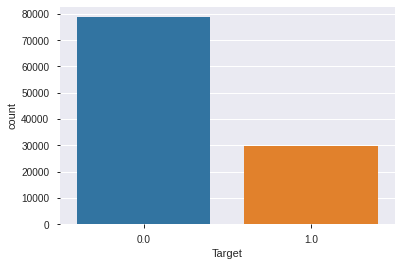

In [120]:
# Visualize the target column

sns.countplot(x='Target',data=data)
plt.show()

Most of datasets collected  , most of people don't use internet banking

In [121]:
# treat age null values

data['age'].fillna(data['age'].mean(), inplace= True)

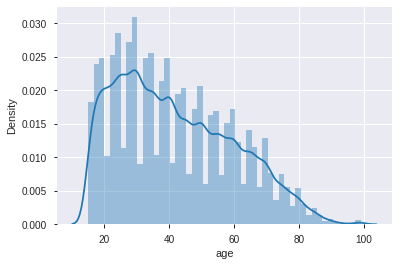

In [122]:
#convert Age into integer

data.age = data.age.astype('int')
# Visualize Age

sns.distplot(data['age'])
plt.show()

No outliers on age column, look well distributed

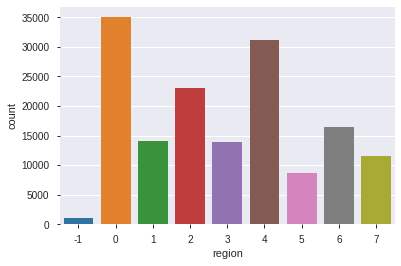

In [123]:
# Visualize Region

sns.countplot(x='region',data=data)
plt.show()

In [124]:
# treat other columns null values

FQ = data.filter(like= 'FQ').columns

for i in FQ :
#     data[i] = data[i].fillna(-9999)
    data[i] = data[i].fillna(-1)
    

# convert FQ to integer since some of them are floats

data[FQ] = data[FQ].astype('int')

In [125]:
#New features

data["age_per_10"] = data.age / 10
data["age_per_100"] = data.age / 100

In [126]:
data["Acc_mobile"] = data.FQ37.astype(str) + "_" + data.FQ33.astype(str)
data["card_mobile"] = data.FQ1.astype(str) + "_" + data.FQ33.astype(str)
#
data["FQ20_FQ21"] = data.FQ20.astype(str) + "_" + data.FQ21.astype(str)
data["FQ6_FQ7"] = data.FQ6.astype(str) + "_" + data.FQ7.astype(str)

In [127]:
data["Count_age"] = data.groupby("region")["age"].transform("count")
data["std_age"] = data.groupby("region")["age"].transform("std")

In [128]:
data["card_freq"] = data.groupby("FQ1")["FQ1"].transform("count") / data.FQ1.count()
data["region_freq"] = data.groupby("region")["region"].transform("count") / data.region.count()
data["FQ10_freq"] = data.groupby("FQ10")["FQ10"].transform("count") / data.FQ10.count()
data["FQ20_freq"] = data.groupby("FQ20")["FQ20"].transform("count") / data.FQ20.count()
data["FQ21_freq"] = data.groupby("FQ21")["FQ21"].transform("count") / data.FQ21.count()
data["FQ19_freq"] = data.groupby("FQ19")["FQ19"].transform("count") / data.FQ19.count()
data["FQ3_freq"] = data.groupby("FQ3")["FQ3"].transform("count") / data.FQ3.count()
data["FQ7_freq"] = data.groupby("FQ7")["FQ7"].transform("count") / data.FQ7.count()

In [129]:
# Frequency encoding using value_counts function 
country_code_freq = data['country_code'].value_counts(normalize=True)

# Mapping the encoded values with original data 
data['country_code_freq'] = data['country_code'].apply(lambda x : country_code_freq[x])

In [130]:
# Frequency encoding using value_counts function 
FQ33_freq = data['FQ33'].value_counts(normalize=True)

# Mapping the encoded values with original data 
data['FQ33_freq'] = data['FQ33'].apply(lambda x : FQ33_freq[x])

In [131]:
for colname in data.select_dtypes("object"):
    data[colname],_=data[colname].factorize()

In [132]:
data.shape

(154923, 49)

In [133]:
# split datasets

train=data[data.Target.notnull()].reset_index(drop=True)
test=data[data.Target.isna()].reset_index(drop=True)

test = test.drop(["Target"],axis = 1)
train.Target = train.Target.astype(int)

### Modelling

In [134]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [135]:
# Separate features and target

feat_cols = train.drop(["ID","Target"], axis=1)

cols = feat_cols.columns

X = train[cols] ; y = train.Target

seed  = 2021

In [136]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_rescaled = scaler.fit_transform(train[cols])
X_test_rescaled = scaler.fit_transform(test[cols])

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_train_rescaled,y, test_size = 0.20, random_state = seed,shuffle=True,stratify=y)

In [138]:
# Train classifier 

rfc = RandomForestClassifier(n_estimators=100,random_state=42)

rfc.fit(X_train,y_train)

# measure classifier performance
roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])

0.5133366617288603

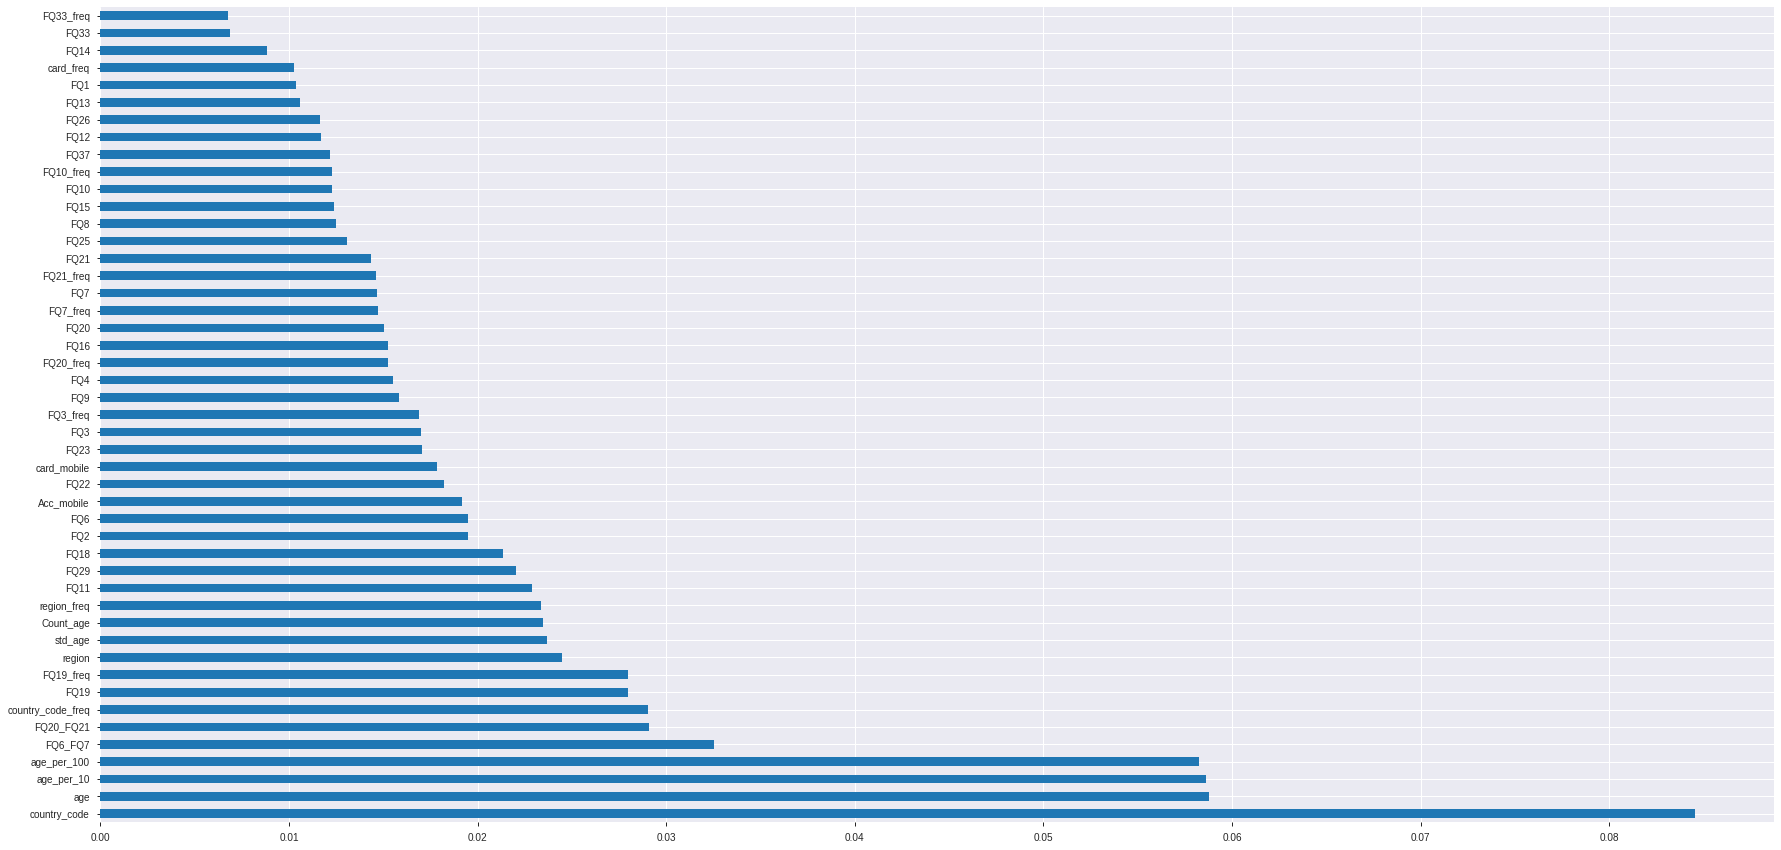

In [139]:
#Let's Visualize on the best contributed features
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
plt.figure(figsize=(30,15))
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

### Prediction & Submission

In [140]:
# make prediction on the test set 
test_preds = rfc.predict_proba(X_test_rescaled)[:, 1]

# create submission dataframe
sub = pd.DataFrame({'ID' :ss.ID ,'Target' :test_preds})

# show sample of the submission data
sub.head()

,ID,Target
0,ID_000YI58E,0.42
1,ID_001SP4JF,0.39
2,ID_001VOF6S,0.32
3,ID_0030LULG,0.32
4,ID_0037PZ3R,0.32


In [101]:
# mkdir submission

In [141]:
# save submission into scv file
sub.to_csv('submission/sub_ffff_rfc_5133.csv',index=False)

In [142]:
files.download("submission/sub_ffff_rfc_5133.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>